In [0]:
%tensorflow_version 2.x

1. 讀入標準套件

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

2. 看一下數據集內容


In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

這是 T-shirt/top


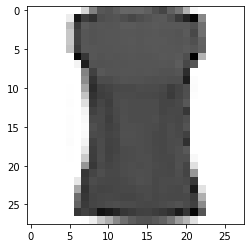

In [10]:
n = 3333
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

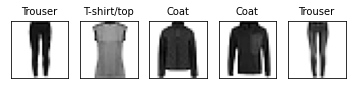

In [13]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')

In [14]:
pick

array([15242, 14339, 42062, 54769, 55200])

3. 
資料整理


In [0]:
x_train = x_train/255
x_test = x_test/255

In [16]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train= x_train.reshape(60000,784)
x_test= x_test.reshape(10000,784)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train= to_categorical(y_train,10)
y_test= to_categorical(y_test,10)

In [22]:
y_train[5555]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

4. 打造神經網路

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import SGD

In [0]:
model = Sequential()
model.add(Dense(46, input_dim=784, activation='relu'))
model.add(Dense(46, activation='relu'))
model.add(Dense(10, activation='softmax'))

5. 組裝神經網路


In [26]:
model.compile(loss='mse', optimizer=SGD(lr=0.056), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 46)                36110     
_________________________________________________________________
dense_1 (Dense)              (None, 46)                2162      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                470       
Total params: 38,742
Trainable params: 38,742
Non-trainable params: 0
_________________________________________________________________


6. 訓練

In [28]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0820 - accuracy: 0.3357
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0626 - accuracy: 0.5917
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0475 - accuracy: 0.6723
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0425 - accuracy: 0.6867
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0385 - accuracy: 0.7247
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0352 - accuracy: 0.7638
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0328 - accuracy: 0.7803
Epoch 8/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0310 - accuracy: 0.7910
Epoch 9/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0298 - accuracy: 0.7999
Epoch 10/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0288 - accuracy: 0.8069

7. 訓練成果

In [29]:
result = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


神經網路預測是: Coat


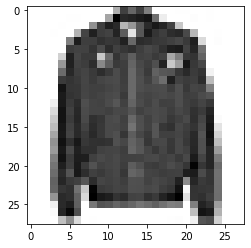

In [33]:
n = 79

print('神經網路預測是:', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')